In [141]:
# Programmers: Grant Burk and Ben Croyle
# Code packages: sympy, numpy, scipy, and matplotlib (see below)
# The approach to implementing was first write out the equation then use python libraries to simplify the expressions
#   for the taylor series. For the power series, it was just writing out the equation then calculating one value at a time.

Part 1: A)

Original Equation = x**2*y(x) - 2*x*Derivative(y(x), x) + Derivative(y(x), (x, 2))
First derivative of initial equation = x**2*Derivative(y(x), x) + 2*x*y(x) - 2*x*Derivative(y(x), (x, 2)) - 2*Derivative(y(x), x) + Derivative(y(x), (x, 3))
Second derivative of initial equation = x**2*Derivative(y(x), (x, 2)) + 4*x*Derivative(y(x), x) - 2*x*Derivative(y(x), (x, 3)) + 2*y(x) - 4*Derivative(y(x), (x, 2)) + Derivative(y(x), (x, 4))
Taylor series expansion terms up to n=4:
y(0) = 1
y'(0) = -1
y''(0) = 0
y'''(0) = -2
y^(4)(0) = -2

Taylor series expansion: -x**4/12 - x**3/3 - x + 1

Value of y at x=3.5: -29.2968750000000

Convergence Constraints:
The radius of convergence for this Taylor series is determined by the nearest singularity to the origin in the complex plane.
Since the differential equation is a linear differential equation with polynomial coefficients, the series has an infinite radius of convergence.


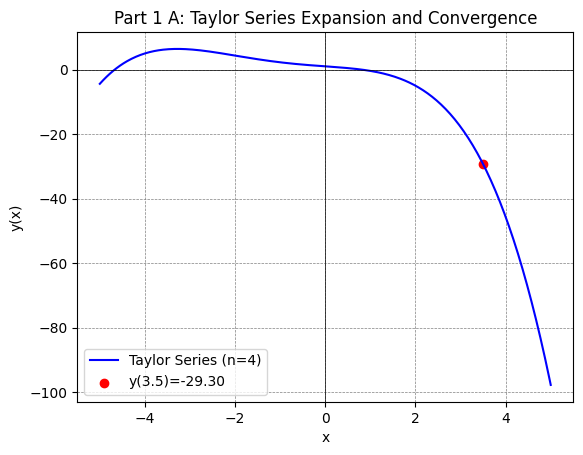

In [142]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

print("Part 1: A)")
print()

# Define the variables and function
x = sp.symbols('x')
y = sp.Function('y')(x)

# Initial conditions
y0 = 1
y_prime = -1

# Define the differential equation
diff_eq = y.diff(x, 2) - 2 * x * y.diff(x) + x**2 * y
print(f"Original Equation = {diff_eq}")

#Calculate y''
y_2prime = -1 * sp.simplify(diff_eq.subs([(y.diff(x, 2), 0), (x, 0), (y.diff(x), y_prime), (y, y0)]))

print(f"First derivative of initial equation = {sp.simplify(diff_eq.diff(x))}") # print the first derivative of the original equation
y_3prime = -1 * sp.simplify(diff_eq.diff(x).subs([(y.diff(x, 3), 0), (y.diff(x, 2), y_2prime), (x, 0), (y.diff(x), y_prime), (y, y0)])) # substitute and solve

print(f"Second derivative of initial equation = {sp.simplify(diff_eq.diff(x, 2))}") # print the second derivative of the original equation
y_4prime = -1 * sp.simplify(diff_eq.diff(x, 2).subs([(y.diff(x, 4), 0), (y.diff(x, 3), y_3prime), (y.diff(x, 2), y_2prime), (y.diff(x), y_prime), (y, y0), (x, 0)])) # substitute and solve

# Construct the Taylor series up to n=4
taylor_series = y0 + y_prime*x + (y_2prime/2)*x**2 + (y_3prime/sp.factorial(3))*x**3 + (y_4prime/sp.factorial(4))*x**4

# Print each term of the Taylor series
print("Taylor series expansion terms up to n=4:")

print(f"y(0) = {y0}")
print(f"y'(0) = {y_prime}")
print(f"y''(0) = {y_2prime}")
print(f"y'''(0) = {y_3prime}")
print(f"y^(4)(0) = {y_4prime}")

# Print the complete Taylor series
print(f"\nTaylor series expansion: {taylor_series}")

# Evaluate the Taylor series at x=3.5
x_value = 3.5
y_at_x = taylor_series.subs(x, x_value)
print(f"\nValue of y at x={x_value}: {y_at_x.evalf()}")

# Discuss the convergence constraints
print("\nConvergence Constraints:")
print("The radius of convergence for this Taylor series is determined by the nearest singularity to the origin in the complex plane.")
print("Since the differential equation is a linear differential equation with polynomial coefficients, the series has an infinite radius of convergence.")

# Visualize the Taylor series and its convergence
# Generate x values
x_vals = np.linspace(-5, 5, 400)
taylor_func = sp.lambdify(x, taylor_series, modules=['numpy'])
y_vals = taylor_func(x_vals)

# Plot the Taylor series
plt.plot(x_vals, y_vals, label="Taylor Series (n=4)", color='blue')
plt.scatter([x_value], [y_at_x.evalf()], color='red', label=f'y({x_value})={y_at_x.evalf():.2f}')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title("Part 1 A: Taylor Series Expansion and Convergence")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.show()




Part 1: B)

Original Equation = -(x - 2)*Derivative(y(x), x) + 2*y(x) + Derivative(y(x), (x, 2))
Taylor series expansion terms up to n=2:
y(3) = 6
y'(3) = 1
y''(3) = -11

Taylor series expansion: -11*x**2/2 + 34*x - 93/2

Convergence Constraints:
The radius of convergence for this Taylor series is determined by the nearest singularity to the point x = 3.
However, for practical purposes, we'll treat it as having sufficient convergence for small intervals around x = 3.


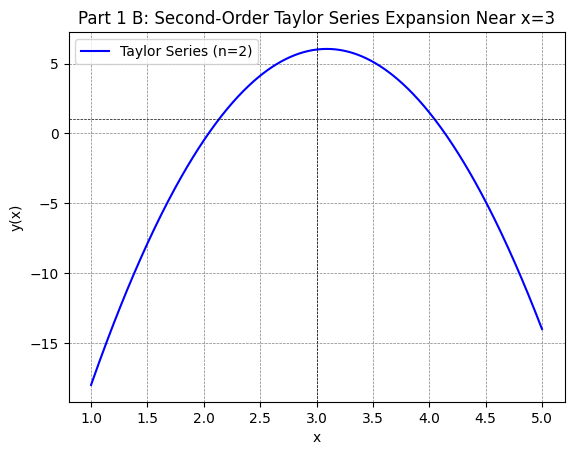

In [143]:
print()
print()
print("Part 1: B)")
print()

# Define the variables and function
x = sp.symbols('x')
y = sp.Function('y')(x)

# Initial conditions
x0 = 3
y3 = 6
y_prime3 = 1

# Define the differential equation
diff_eq = y.diff(x, 2) - (x - 2) * y.diff(x) + 2 * y
print(f"Original Equation = {diff_eq}")

#Calculate y''
y_2prime3  = -1 * sp.simplify(diff_eq.subs([(y.diff(x, 2), 0), (y.diff(x), y_prime3), (y, y3), (x, 3)])) # substitute and solve

# Construct the Taylor series up to n=2
taylor_series = sp.simplify(y3 + y_prime3 * (x - x0) + (y_2prime3 / 2) * (x - x0)**2)

# Print each term of the Taylor series
print("Taylor series expansion terms up to n=2:")

print(f"y(3) = {y3}")
print(f"y'(3) = {y_prime3}")
print(f"y''(3) = {y_2prime3}")

# Print the complete Taylor series
print(f"\nTaylor series expansion: {taylor_series}")

# Discuss convergence constraints
print("\nConvergence Constraints:")
print("The radius of convergence for this Taylor series is determined by the nearest singularity to the point x = 3.")
print("However, for practical purposes, we'll treat it as having sufficient convergence for small intervals around x = 3.")

# Visualize the Taylor series
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x_vals = np.linspace(x0 - 2, x0 + 2, 400)
taylor_func = sp.lambdify(x, taylor_series, modules=['numpy'])
y_vals = taylor_func(x_vals)

# Plot the Taylor series
plt.plot(x_vals, y_vals, label="Taylor Series (n=2)", color='blue')
plt.axhline(y0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(x0, color='black', linewidth=0.5, linestyle='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title("Part 1 B: Second-Order Taylor Series Expansion Near x=3")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.show()




Part 2:

Coefficients up to n=8:
a_0 = 1
a_1 = 1
a_2 = -0.0625
a_3 = -0.0875
a_4 = 0.0067708333333333336
a_5 = 0.0109375
a_6 = -0.0009370349702380953
a_7 = -0.0016330295138888887
a_8 = 0.00014836387028769842


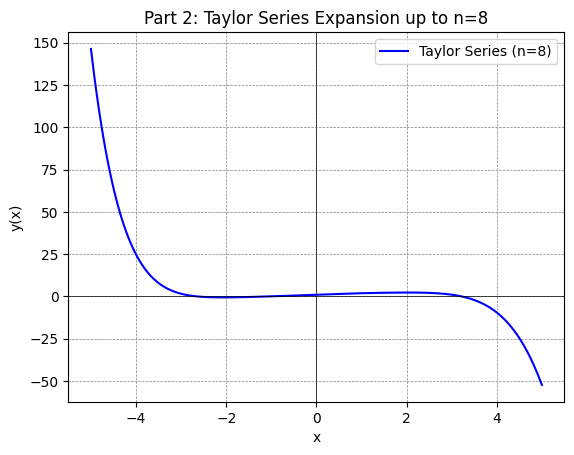

In [144]:
print()
print()
print("Part 2:")
print()

# Define the recurrence relation
def recurrence_relation(n, a):
    if n == 0:
        return 1  # a_0 = 0
    elif n == 1:
        return 1  # a_1 = 1
    else:
        return -((n*(n-1) + 1) * a[n-2] / (4 * (n+2)*(n+1)))

# Calculate coefficients up to n ≤ 8
a = [0] * 9  # Initialize coefficients list (0 to 8)
a[0] = 1  # Initial condition: a_0 = 0
a[1] = 1  # Initial condition: a_1 = 1/4

for n in range(2, 9):
    a[n] = recurrence_relation(n, a)

# Print coefficients
print("Coefficients up to n=8:")
for i in range(9):
    print(f"a_{i} = {a[i]}")

# Define the Taylor series up to x^8
def taylor_series(x, a):
    return sum(a[n] * x**n for n in range(9))

# Generate x values for plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = taylor_series(x_vals, a)

# Plot the Taylor series
plt.plot(x_vals, y_vals, label="Taylor Series (n=8)", color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title("Part 2: Taylor Series Expansion up to n=8")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.show()




Part 3:



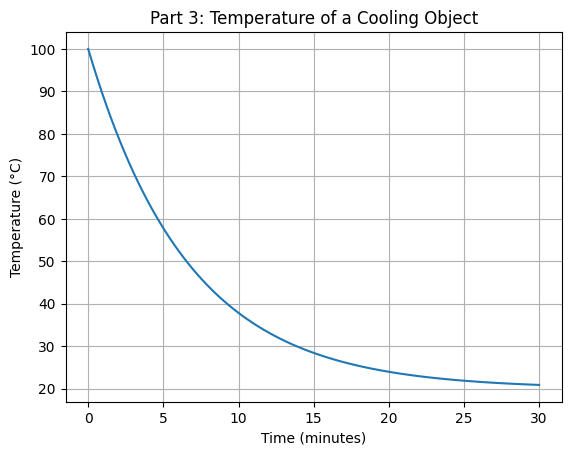

In [145]:
# Programmers: Grant Burk and Ben Croyle
# Code packages: numpy, scipy, and matplotlib (see below)
# The approach to implementing was first to model an ODE in python, in which we choose Newton's law of cooling to depict a CPU cooling. Second, we chose parameters for our system. Lastly, we used odeint to integrate the ODE and plotted it using matplotlib.

print()
print()
print("Part 3:")
print()

# Define the ODE
def cooling_rate(T, t, k, T_ambient):
    return -k * (T - T_ambient) # Newton's Law of Cooling formula

# Parameters
H = 150 # W/m^2 aluminum heat transfer rate
A = 0.001 # m^2 - estimated cpu surface area 
T_ambient = 20  # Ambient temperature
T_initial = 100  # Initial temperature

# Time points
t = np.linspace(0, 30, 100)  # Time in minutes

# Solve the ODE
T = odeint(cooling_rate, T_initial, t, args=(H * A, T_ambient))

# Plot the solution
plt.plot(t, T)
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Part 3: Temperature of a Cooling Object")
plt.grid(True)
plt.show()